<a href="https://colab.research.google.com/github/Kahzain/Fail.Try-to-use-github/blob/main/Comparaci%C3%B3n_de_los_modelos_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERIC GUILLERMO KAHZAIN GARCIA PRIERO
PRACTICA DOS MODULO 2


In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import plotly.express as px

data_path = '/content/drive/MyDrive/MODULO2 DIPLO/'

bmw = pd.read_csv(data_path+'bmw.csv')
toyota = pd.read_csv(data_path+'toyota.csv')
audi = pd.read_csv(data_path+'audi.csv')

In [2]:
# Carga del modelo de SKleanr. 
from sklearn.linear_model import LinearRegression

In [3]:
bmw['age_car'] = 2022 - bmw['year']
bmw['precio']=1/bmw['price']
bmw['millas'] = bmw['mileage'].map(np.log)

toyota['age_car'] = 2022 - toyota['year']
toyota['precio']=1/toyota['price']
toyota['millas'] = toyota['mileage'].map(np.log)

audi['age_car'] = 2022 - audi['year']
audi['precio']=1/audi['price']
audi['millas'] = audi['mileage'].map(np.log)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


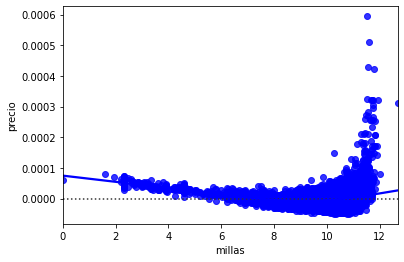

In [4]:
fig = px.scatter(toyota, x="age_car", y="precio", trendline="ols")
# fig.show()

#sns.residplot(x=bmw['millas'], y=bmw['precio'], lowess=True, color='b')
#sns.residplot(x=toyota['millas'], y=toyota['precio'], lowess=True, color='b')
sns.residplot(x=audi['millas'], y=audi['precio'], lowess=True, color='b')

In [5]:
from sklearn.linear_model import LinearRegression
import plotly.express as px
import seaborn as sns
import numpy as np


def linear_analysis(df, cols, tar, plot=True, intercept=True, res_plot=True):

    X = df[cols].copy()
    y = df[[tar]].copy()

    if intercept: lr = LinearRegression()
    else: lr = LinearRegression(fit_intercept=False)
    lr.fit(X,y)
    coef_l = [(c,j) for c,j in zip(cols,lr.coef_[0])]
    print(f'Los coeficientes de su modelo son: {coef_l}')
    if intercept: print(f'El intercepto de su modelo es: {lr.intercept_}')

    if plot: print(sns.lmplot(data=df, x=cols[0], y=tar, fit_reg=False))

    df2 = df.copy()
    df2['predictions'] = lr.predict(X)
    df2['residuals'] = df2[tar]-df2['predictions']

    if res_plot:
        mean = df2['residuals'].mean()
        median = df2['residuals'].median()
        std = df2['residuals'].std()
        print(f'Residuals mean value is: {mean}.')
        print(f'Residuals median value is: {median}.')
        print(f'Residuals std value is: {std}.')
        fig = px.histogram(df2, x='residuals', marginal='box')
        fig.show()
    
    return(lr, df2)


Los coeficientes de su modelo son: [('millas', -5.459918996327638e-07), ('age_car', 1.1758638911195488e-05)]
El intercepto de su modelo es: [3.01353181e-06]
Residuals mean value is: -9.654337126297043e-22.
Residuals median value is: -1.2012046932862374e-07.
Residuals std value is: 2.2420925933865153e-05.


Por cada Milla recorrida se pierde un total de: -5.459918996327638e-07 dólar.
Por cada año de antigüedad se pierde un total de: 1.1758638911195488e-05 dólar.
Y se pierde un dólar por cada: -1831529.003768378 milla.
Y se pierde un dólar por cada: 85043.85648307412 año.
Los coeficientes de su modelo son: [('millas', -5.627659816523224e-06), ('age_car', 1.9137386225428067e-05)]
El intercepto de su modelo es: [5.36127413e-05]
Residuals mean value is: -1.9566486223543682e-20.
Residuals median value is: -4.920576835852522e-07.
Residuals std value is: 4.519511000931195e-05.


Por cada Milla recorrida se pierde un total de: -5.459918996327638e-07 dólar.
Por cada año de antigüedad se pierde un total de: 1.1758638911195488e-05 dólar.
Y se pierde un dólar por cada: -1831529.003768378 milla.
Y se pierde un dólar por cada: 85043.85648307412 año.
Los coeficientes de su modelo son: [('millas', -7.499398687399119e-07), ('age_car', 1.1500440345721116e-05)]
El intercepto de su modelo es: [5.52651386e-06]
Residuals mean value is: -7.967889981520767e-21.
Residuals median value is: -2.360481287916277e-07.
Residuals std value is: 2.0081116854056433e-05.


Por cada Milla recorrida se pierde un total de: -5.459918996327638e-07 dólar.
Por cada año de antigüedad se pierde un total de: 1.1758638911195488e-05 dólar.
Y se pierde un dólar por cada: -1831529.003768378 milla.
Y se pierde un dólar por cada: 85043.85648307412 año.


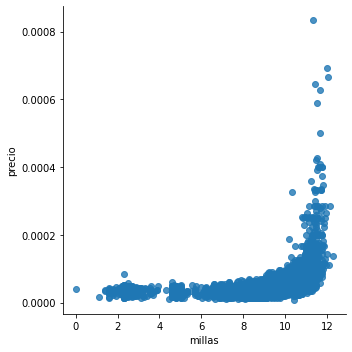

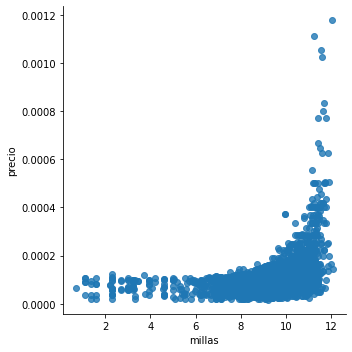

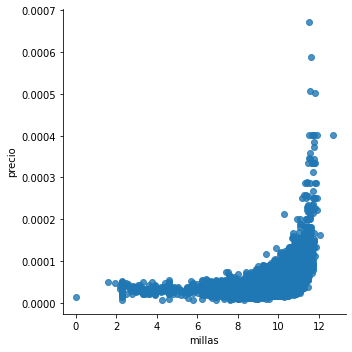

In [6]:
lrbmw, dfbmw = linear_analysis(bmw, ['millas', 'age_car'], 'precio')
print(f'Por cada Milla recorrida se pierde un total de: {lrbmw.coef_[0][0]} dólar.')
print(f'Por cada año de antigüedad se pierde un total de: {lrbmw.coef_[0][1]} dólar.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][0]} milla.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][1]} año.')



lrtoyota, dftoyota= linear_analysis(toyota, ['millas', 'age_car'], 'precio')
print(f'Por cada Milla recorrida se pierde un total de: {lrbmw.coef_[0][0]} dólar.')
print(f'Por cada año de antigüedad se pierde un total de: {lrbmw.coef_[0][1]} dólar.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][0]} milla.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][1]} año.')

lraudi, dfaudi= linear_analysis(audi, ['millas', 'age_car'], 'precio')
print(f'Por cada Milla recorrida se pierde un total de: {lrbmw.coef_[0][0]} dólar.')
print(f'Por cada año de antigüedad se pierde un total de: {lrbmw.coef_[0][1]} dólar.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][0]} milla.')
print(f'Y se pierde un dólar por cada: {1/lrbmw.coef_[0][1]} año.')

In [7]:
# 3.- Independencia
from statsmodels.formula.api import ols

#fit multiple linear regression model
model_bmw = ols('precio ~ millas + age_car', data=bmw).fit()
model_toyota = ols('precio ~ millas + age_car', data=toyota).fit()
model_audi = ols('precio ~ millas + age_car', data=audi).fit()
#view model summary
print(model_bmw.summary())

print(model_toyota.summary())

print(model_audi.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     7792.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:58:28   Log-Likelihood:             1.0012e+05
No. Observations:               10781   AIC:                        -2.002e+05
Df Residuals:                   10778   BIC:                        -2.002e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.014e-06   1.05e-06      2.874      0.0

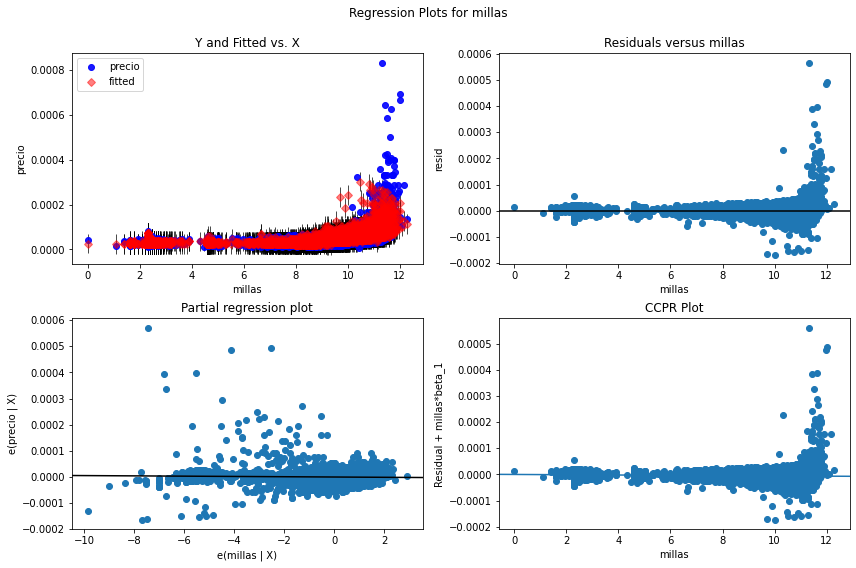

In [8]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

lr_bmw = ols('precio ~ millas + age_car', data=dfbmw).fit()

fig = plt.figure(figsize=(12, 8))

fig = sm.graphics.plot_regress_exog(lr_bmw, 'millas', fig=fig)

In [9]:
dfbmw.sort_values(by='age_car', ascending=True)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_car,precio,millas,predictions,residuals
4376,X2,2020,34360,Semi-Auto,835,Petrol,145,38.7,2.0,2,0.000029,6.727432,0.000023,0.000006
3274,5 Series,2020,28990,Semi-Auto,103,Petrol,145,50.4,2.0,2,0.000034,4.634729,0.000024,0.000010
7899,2 Series,2020,25000,Automatic,101,Petrol,145,47.9,2.0,2,0.000040,4.615121,0.000024,0.000016
6965,X3,2020,52991,Semi-Auto,4360,Hybrid,135,5.5,2.0,2,0.000019,8.380227,0.000022,-0.000003
7898,3 Series,2020,37250,Automatic,101,Diesel,145,47.9,3.0,2,0.000027,4.615121,0.000024,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,23,0.000833,11.314475,0.000267,0.000566
9555,Z3,1999,3995,Manual,74282,Petrol,245,35.3,1.9,23,0.000250,11.215624,0.000267,-0.000017
9842,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9,24,0.000253,10.941996,0.000279,-0.000026
9841,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9,25,0.000253,10.799576,0.000291,-0.000038


In [14]:
X=dfbmw[['millas', 'age_car']].copy()
y=dfbmw[['precio']].copy()

dfbmw['linealR_residuals'] = dfbmw['precio'] - pd.Series(lr_bmw.predict(X))

dfbmw[['linealR_residuals']].describe(percentiles=[i/10 for i in range(11)])

,linealR_residuals
count,1.078100e+04
mean,-7.514292e-19
std,2.242093e-05
min,-1.675471e-04
0%,-1.675471e-04
10%,-1.986565e-05
20%,-1.279662e-05
30%,-7.843811e-06
40%,-3.494283e-06
50%,-1.201205e-07


In [12]:
# modelo lineal lasso

from sklearn.linear_model import Lasso


X=dfbmw[['millas', 'age_car']].copy()
y=dfbmw[['precio']].copy()

lasso = Lasso(alpha=.0)
lasso.fit(X,y)
lasso.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.710e-06, tolerance: 1.325e-09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



array([-5.45991900e-07,  1.17586389e-05])

In [16]:
#bmw['lasso_residuals'] =y - pd.Series(lasso.predict(X))
#bmw[['lasso_residuals']].describe(percentiles=[i/10 for i in range(11)])

dfbmw['lasso_residuals'] = dfbmw['precio'] - pd.Series(lasso.predict(X))

dfbmw[['lasso_residuals']].describe(percentiles=[i/10 for i in range(11)])

,lasso_residuals
count,1.078100e+04
mean,3.218112e-22
std,2.242093e-05
min,-1.675471e-04
0%,-1.675471e-04
10%,-1.986565e-05
20%,-1.279662e-05
30%,-7.843811e-06
40%,-3.494283e-06
50%,-1.201205e-07


In [17]:
######## LARS

from sklearn.linear_model import Lars
lars = Lars()
lars.fit(X,y)

lars.coef_
dfbmw['lars_residuals'] =dfbmw['precio']- pd.Series(lars.predict(X))

dfbmw[['lars_residuals']].describe(percentiles=[i/10 for i in range(11)])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





,lars_residuals
count,1.078100e+04
mean,4.827169e-22
std,2.244090e-05
min,-1.605310e-04
0%,-1.605310e-04
10%,-1.969654e-05
20%,-1.302942e-05
30%,-7.821852e-06
40%,-3.750480e-06
50%,-2.084677e-07


In [18]:
### RIDGE

from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.5)
ridge.fit(X,y)

ridge.coef_

dfbmw['ridge_residuals'] = dfbmw['precio'] - pd.Series([x[0] for x in ridge.predict(X)])

dfbmw[['ridge_residuals']].describe(percentiles=[i/10 for i in range(11)])

,ridge_residuals
count,1.078100e+04
mean,8.045281e-22
std,2.242093e-05
min,-1.675445e-04
0%,-1.675445e-04
10%,-1.986588e-05
20%,-1.279646e-05
30%,-7.844070e-06
40%,-3.494247e-06
50%,-1.203479e-07


In [19]:
### ELASTIC NET

from sklearn.linear_model import ElasticNet


elsnet = ElasticNet(alpha=.5)
elsnet.fit(X,y)

elsnet.coef_

dfbmw['elsnet_residuals'] = dfbmw['precio'] - pd.Series(elsnet.predict(X))

dfbmw[['elsnet_residuals']].describe(percentiles=[i/10 for i in range(11)])

,elsnet_residuals
count,1.078100e+04
mean,6.436225e-21
std,3.506463e-05
min,-4.772992e-05
0%,-4.772992e-05
10%,-2.804834e-05
20%,-2.248552e-05
30%,-1.736696e-05
40%,-1.231387e-05
50%,-6.958895e-06


In [20]:
vars_ = [c+'_residuals' for c in ['linealR','lasso', 'ridge', 'elsnet', 'lars']]

dfbmw[vars_].describe(percentiles=[i/10 for i in range(11)])

,linealR_residuals,lasso_residuals,ridge_residuals,elsnet_residuals,lars_residuals
count,1.078100e+04,1.078100e+04,1.078100e+04,1.078100e+04,1.078100e+04
mean,-7.514292e-19,3.218112e-22,8.045281e-22,6.436225e-21,4.827169e-22
std,2.242093e-05,2.242093e-05,2.242093e-05,3.506463e-05,2.244090e-05
min,-1.675471e-04,-1.675471e-04,-1.675445e-04,-4.772992e-05,-1.605310e-04
0%,-1.675471e-04,-1.675471e-04,-1.675445e-04,-4.772992e-05,-1.605310e-04
10%,-1.986565e-05,-1.986565e-05,-1.986588e-05,-2.804834e-05,-1.969654e-05
20%,-1.279662e-05,-1.279662e-05,-1.279646e-05,-2.248552e-05,-1.302942e-05
30%,-7.843811e-06,-7.843811e-06,-7.844070e-06,-1.736696e-05,-7.821852e-06
40%,-3.494283e-06,-3.494283e-06,-3.494247e-06,-1.231387e-05,-3.750480e-06
50%,-1.201205e-07,-1.201205e-07,-1.203479e-07,-6.958895e-06,-2.084677e-07


In [23]:
toyota['HIBRIDO'] = np.where(toyota['fuelType']=='Hybrid', 1, 0)
toyota.head()
toyota['HIBRIDO'].cumsum()

0          0
1          0
2          0
3          0
4          0
        ... 
6733    2043
6734    2043
6735    2043
6736    2043
6737    2043
Name: HIBRIDO, Length: 6738, dtype: int64

In [25]:
toyota['fuelType'].value_counts(1, dropna=False)

Petrol    0.606560
Hybrid    0.303206
Diesel    0.074651
Other     0.015583
Name: fuelType, dtype: float64

In [27]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

log_reg = LogisticRegressionCV()
X = toyota[['price', 'mileage', 'mpg']].copy()
y = toyota['HIBRIDO'].copy()

log_reg.fit(X,y)

LogisticRegressionCV()

In [30]:
log_reg.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, log_reg.predict(X))

0.9612644701691897

In [31]:
accuracy_score(y, log_reg.predict(X))

0.9612644701691897